In [ ]:
from mutagen.mp3 import MP3
import librosa as lb, numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

In [ ]:
path = '../music/out.mp3'
file = MP3(path)
file.info.pprint()

'MPEG 1 layer 3, 45508 bps (VBR), 48000 Hz, 2 chn, 6150.29 seconds'

In [ ]:
sr = 20100 #Hz
sr_s = 1000 #Hz

y, sr = lb.load(path, mono=True, sr=sr)
y_s, _ = lb.load(path, mono=True, sr=sr_s)

[<matplotlib.lines.Line2D>]

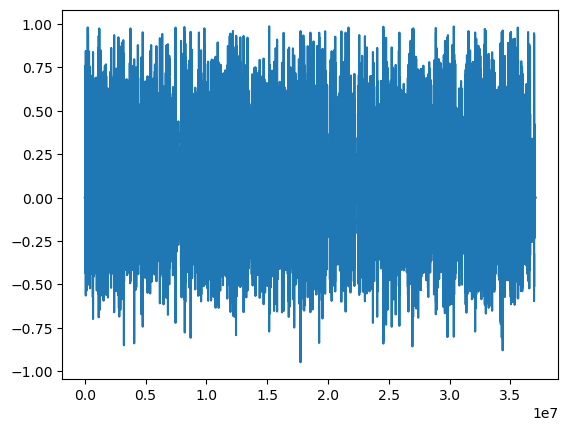

In [ ]:
plt.plot(y[int(len(y)*0.7):])

In [ ]:
Audio(data=y[0:10*sr], rate=sr)

In [ ]:
import soundfile as sf
sf.write('out.wav',y_s, sr_s)

In [ ]:
Audio(data=y_s[0:10*sr_s], rate=sr_s)

[<matplotlib.lines.Line2D>]

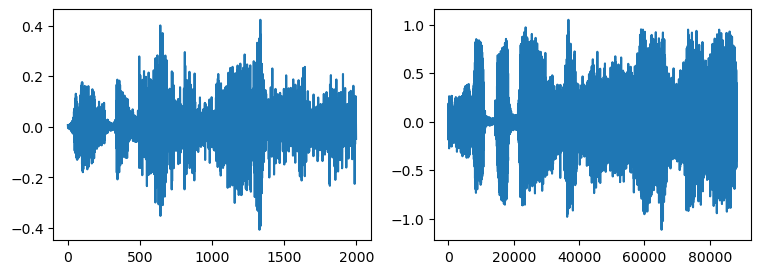

In [ ]:
axes = plt.subplots(ncols=2, figsize=(9,3))[1]
s, ds = 1, 2
axes[0].plot(y_s[int(s*sr_s):int((s+ds)*sr_s)])
axes[1].plot(y[int(s*sr):int((s+ds)*sr)])

The formula for the bit rate is as follows:
${\displaystyle {\text{bit rate}}={\text{sample rate}}\times {\text{bit depth}}\times {\text{channels}}}$

From it we can estimate the initial size of the file.

Since in our case we have 1 channel, we can also easily compute audio length by dividing length of `y` by `sr`

In [ ]:
t = (y.shape[0]/sr)/60
f'{t//1}m {t%1*60:.1f}s'

'2.0m 46.7s'

$\text{n\_fft} = \text{nearest power of 2 greater than or equal to} \left( \text{Frame duration} \times \text{Sampling rate} \right)$

In [ ]:
D = lb.stft(y[int(len(y)*0.8):], n_fft=1000)  # STFT of y
S_db = lb.amplitude_to_db(np.abs(D), ref=np.max)

# D = lb.stft(y_s[int(s*sr_s):int((s+ds)*sr_s)], n_fft=256)  # STFT of y
# S_db_s = lb.amplitude_to_db(np.abs(D), ref=np.max)

In [ ]:
S_db.shape

(501, 98897)

Text(0.5, 0.98, 'Using a logarithmic frequency axis')

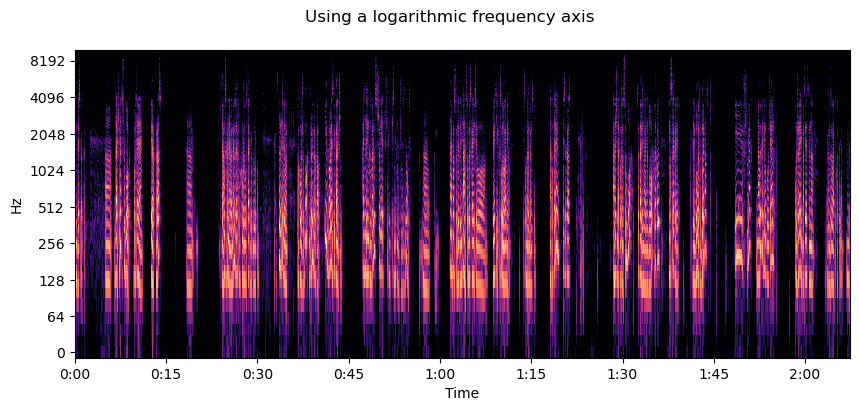

In [ ]:
fig, ax = plt.subplots(ncols=1, figsize=(10,4))
img = lb.display.specshow(S_db[:,:5000],sr=sr, x_axis='time', y_axis='log', ax=ax)
# img2 = lb.display.specshow(S_db_s,sr=sr_s, x_axis='time', y_axis='log', ax=ax[1])
fig.suptitle('Using a logarithmic frequency axis')
# fig.colorbar(img2, ax=ax[1], format="%+2.f dB")